In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()

In [8]:
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
   Cluster  Annual Income (k$)  Spending Score (1-100)
0        0           55.296296               49.518519
1        1           86.538462               82.128205
2        2           25.727273               79.363636
3        3           88.200000               17.114286
4        4           26.304348               20.913043


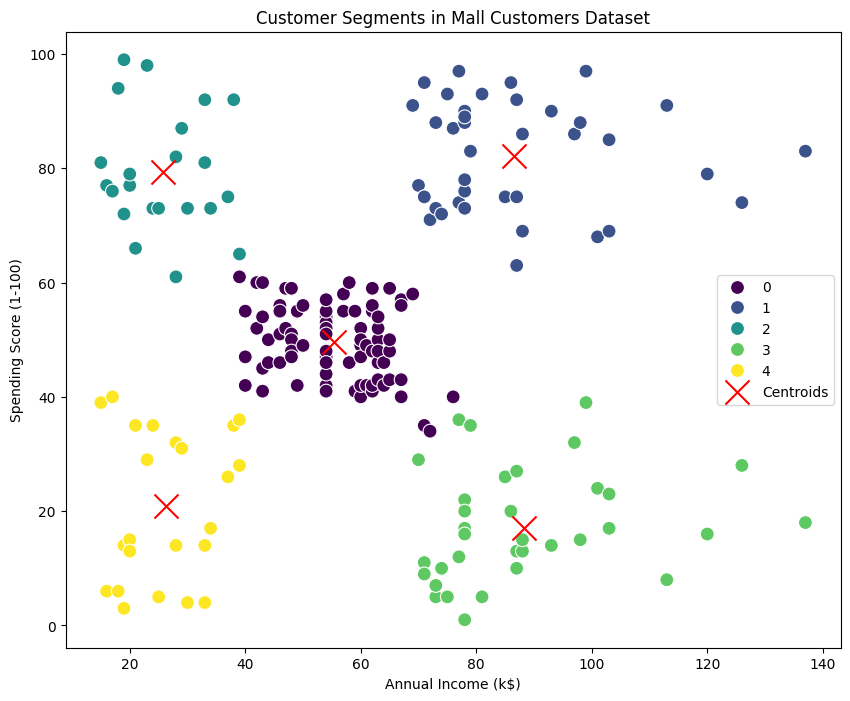

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='x')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments in Mall Customers Dataset')
plt.legend()

In [10]:
for cluster in range(5):
    subset = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Number of Customers: {len(subset)}")
    print(f"Mean Annual Income: {subset['Annual Income (k$)'].mean():.2f} k$")
    print(f"Mean Spending Score: {subset['Spending Score (1-100)'].mean():.2f}")


Cluster 0:
Number of Customers: 81
Mean Annual Income: 55.30 k$
Mean Spending Score: 49.52

Cluster 1:
Number of Customers: 39
Mean Annual Income: 86.54 k$
Mean Spending Score: 82.13

Cluster 2:
Number of Customers: 22
Mean Annual Income: 25.73 k$
Mean Spending Score: 79.36

Cluster 3:
Number of Customers: 35
Mean Annual Income: 88.20 k$
Mean Spending Score: 17.11

Cluster 4:
Number of Customers: 23
Mean Annual Income: 26.30 k$
Mean Spending Score: 20.91
